In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv',sep='\t')

In [5]:
# df = dataframe

df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
# How many text messages exist?

len(df)

5572

In [7]:
# to access columns

df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
# how many unique values?

df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

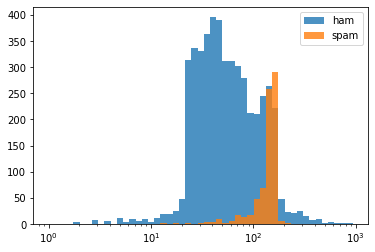

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

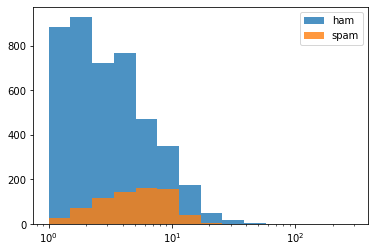

In [10]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [11]:
# Split data into test and training sets

from sklearn.model_selection import train_test_split

In [13]:
# X feature data
X = df[['length','punct']]
# y is our label
y = df['label']

X_train, X_test, y_train, y_test = train_test_split = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
X_train.shape

(3900, 2)

In [20]:
# X_test

In [19]:
# y_test

In [21]:
# Create and train a ML model

from sklearn.linear_model import LogisticRegression

In [28]:
lr_model = LogisticRegression(solver='lbfgs')

In [30]:
lr_model.fit(X_train,y_train)   

LogisticRegression()

In [31]:
# testing the accuracy of the dataset

from sklearn import metrics

In [32]:
predictions = lr_model.predict(X_test)

In [33]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [34]:
print(metrics.confusion_matrix(y_test,predictions))

[[1404   44]
 [ 219    5]]


In [36]:
# More clear layout

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [37]:
# Above Confusion matrix says we only correctly classified 5 spam as spam, but incorrectly classified 44 spam as ham
# We incorrectly classified 219 ham as spam, but correctly classified 1404 ham as ham

In [38]:
# Using the classification report we see that we have high success of precision and recall for ham, but low for spam

print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [39]:
# print overall accuracy of the scores

print(metrics.accuracy_score(y_test,predictions))

0.8427033492822966


In [40]:
# Trying another ML model

from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train,y_train)

predictions = nb_model.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]


In [41]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])
df

,ham,spam
ham,1438,10
spam,224,0


In [42]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [43]:
# Another model

from sklearn.svm import SVC

In [44]:
svc_model = SVC(gamma='auto')

svc_model.fit(X_train,y_train)

predictions = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))

[[1373   75]
 [ 121  103]]


In [45]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672

